<a href="https://colab.research.google.com/github/RISHIKA-hub-929/PRODIGY_DS_02/blob/main/Titanic_Survival_Prediction_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/Titanic-Dataset.csv")  # Adjust path if needed
print(df.head())  # Display the first few rows


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(df.isnull().sum())  # Shows missing values per column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing ages with median age
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  # Fill missing embarkation points
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})  # Convert 'Sex' to numerical


<ipython-input-11-1bf41cff2fff>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing ages with median age
<ipython-input-11-1bf41cff2fff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Select relevant features
y = df['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)  # Train model

y_pred = model.predict(X_test)  # Make predictions
accuracy = accuracy_score(y_test, y_pred)  # Check accuracy

print(f"Model Accuracy: {accuracy:.2f}")  # Print accuracy


Model Accuracy: 0.81


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-15-34908eb95ad7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette="coolwarm")


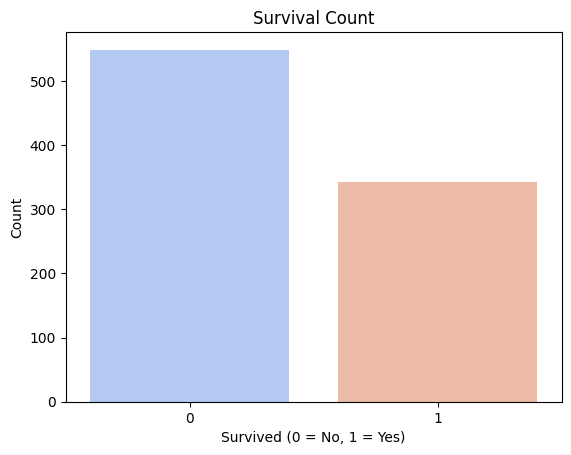

In [ ]:
sns.countplot(x='Survived', data=df, palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


<ipython-input-16-330fa9e85c76>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="viridis")


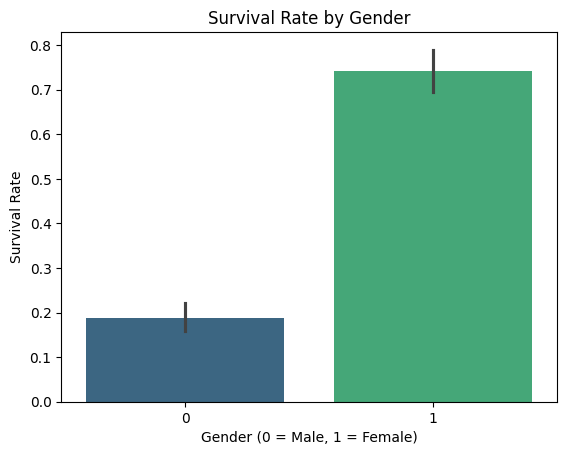

In [ ]:
sns.barplot(x="Sex", y="Survived", data=df, palette="viridis")
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()


<ipython-input-18-4c48289c46b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="rocket")


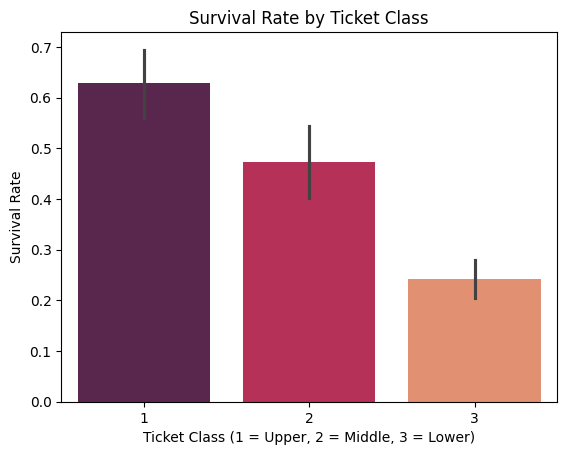

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=df, palette="rocket")
plt.title("Survival Rate by Ticket Class")
plt.xlabel("Ticket Class (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Survival Rate")
plt.show()


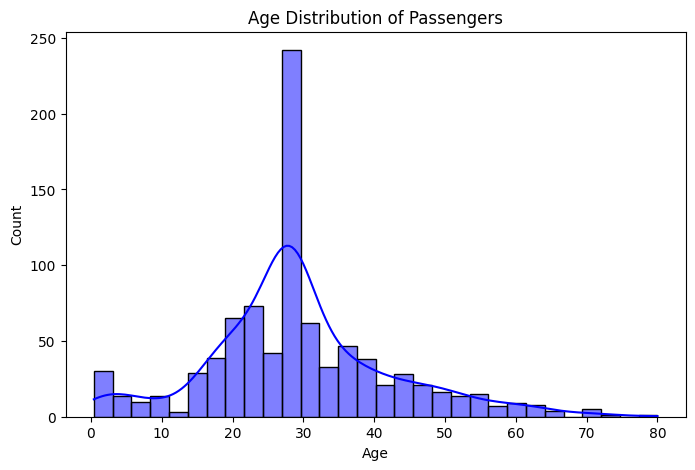

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
